# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 3: Web APIs & Classification

### Description

In week four we've learned about a few different classifiers. In week five we'll learn about webscraping, APIs, and Natural Language Processing (NLP). Now we're going to put those skills to the test.

For project 3, your goal is two-fold:
1. Using Reddit's API, you'll collect posts from two subreddits of your choosing.
2. You'll then use NLP to train a classifier on which subreddit a given post came from. This is a binary classification problem.


#### About the API

Reddit's API is fairly straightforward. For example, if I want the posts from [`/r/boardgames`](https://www.reddit.com/r/boardgames), all I have to do is add `.json` to the end of the url: https://www.reddit.com/r/boardgames.json

To help you get started, we have a primer video on how to use Reddit's API: https://www.youtube.com/watch?v=5Y3ZE26Ciuk

---

### Requirements

- Gather and prepare your data using the `requests` library.
- **Create and compare two models**. One of these must be a Bayes classifier, however the other can be a classifier of your choosing: logistic regression, KNN, SVM, etc.
- A Jupyter Notebook with your analysis for a peer audience of data scientists.
- An executive summary of the results you found.
- A short presentation outlining your process and findings for a semi-technical audience.

**Pro Tip 1:** You can find a good example executive summary [here](https://www.proposify.biz/blog/executive-summary).

**Pro Tip 2:** Reddit will give you 25 posts **per request**. To get enough data, you'll need to hit Reddit's API **repeatedly** (most likely in a `for` loop). _Be sure to use the `time.sleep()` function at the end of your loop to allow for a break in between requests. **THIS IS CRUCIAL**_

**Pro tip 3:** The API will cap you at 1,000 posts for each subreddit (assuming the subreddit has that many posts).

**Pro tip 4:** At the end of each loop, be sure to save the results from your scrape as a `csv`: JSON from Reddit > Pandas DataFrame > CSV. That way, if something goes wrong in your loop, you won't lose all your data.

---

### Necessary Deliverables / Submission

- Code and executive summary must be in a clearly commented Jupyter Notebook.
- You must submit your slide deck.
- Materials must be submitted by **9:00 AM on Friday, Oct 25th**.

---

## Rubric
Your local instructor will evaluate your project (for the most part) using the following criteria.  You should make sure that you consider and/or follow most if not all of the considerations/recommendations outlined below **while** working through your project.

For Project 3 the evaluation categories are as follows:<br>
**The Data Science Process**
- Problem Statement
- Data Collection
- Data Cleaning & EDA
- Preprocessing & Modeling
- Evaluation and Conceptual Understanding
- Conclusion and Recommendations

**Organization and Professionalism**
- Organization
- Visualizations
- Python Syntax and Control Flow
- Presentation

**Scores will be out of 30 points based on the 10 categories in the rubric.** <br>
*3 points per section*<br>

| Score | Interpretation |
| --- | --- |
| **0** | *Project fails to meet the minimum requirements for this item.* |
| **1** | *Project meets the minimum requirements for this item, but falls significantly short of portfolio-ready expectations.* |
| **2** | *Project exceeds the minimum requirements for this item, but falls short of portfolio-ready expectations.* |
| **3** | *Project meets or exceeds portfolio-ready expectations; demonstrates a thorough understanding of every outlined consideration.* |


### The Data Science Process

**Problem Statement**
- Is it clear what the goal of the project is?
- What type of model will be developed?
- How will success be evaluated?
- Is the scope of the project appropriate?
- Is it clear who cares about this or why this is important to investigate?
- Does the student consider the audience and the primary and secondary stakeholders?

**Data Collection**
- Was enough data gathered to generate a significant result?
- Was data collected that was useful and relevant to the project?
- Was data collection and storage optimized through custom functions, pipelines, and/or automation?
- Was thought given to the server receiving the requests such as considering number of requests per second?

**Data Cleaning and EDA**
- Are missing values imputed/handled appropriately?
- Are distributions examined and described?
- Are outliers identified and addressed?
- Are appropriate summary statistics provided?
- Are steps taken during data cleaning and EDA framed appropriately?
- Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

**Preprocessing and Modeling**
- Is text data successfully converted to a matrix representation?
- Are methods such as stop words, stemming, and lemmatization explored?
- Does the student properly split and/or sample the data for validation/training purposes?
- Does the student test and evaluate a variety of models to identify a production algorithm (**AT MINIMUM:** Bayes and one other model)?
- Does the student defend their choice of production model relevant to the data at hand and the problem?
- Does the student explain how the model works and evaluate its performance successes/downfalls?

**Evaluation and Conceptual Understanding**
- Does the student accurately identify and explain the baseline score?
- Does the student select and use metrics relevant to the problem objective?
- Does the student interpret the results of their model for purposes of inference?
- Is domain knowledge demonstrated when interpreting results?
- Does the student provide appropriate interpretation with regards to descriptive and inferential statistics?

**Conclusion and Recommendations**
- Does the student provide appropriate context to connect individual steps back to the overall project?
- Is it clear how the final recommendations were reached?
- Are the conclusions/recommendations clearly stated?
- Does the conclusion answer the original problem statement?
- Does the student address how findings of this research can be applied for the benefit of stakeholders?
- Are future steps to move the project forward identified?


### Organization and Professionalism

**Project Organization**
- Are modules imported correctly (using appropriate aliases)?
- Are data imported/saved using relative paths?
- Does the README provide a good executive summary of the project?
- Is markdown formatting used appropriately to structure notebooks?
- Are there an appropriate amount of comments to support the code?
- Are files & directories organized correctly?
- Are there unnecessary files included?
- Do files and directories have well-structured, appropriate, consistent names?

**Visualizations**
- Are sufficient visualizations provided?
- Do plots accurately demonstrate valid relationships?
- Are plots labeled properly?
- Are plots interpreted appropriately?
- Are plots formatted and scaled appropriately for inclusion in a notebook-based technical report?

**Python Syntax and Control Flow**
- Is care taken to write human readable code?
- Is the code syntactically correct (no runtime errors)?
- Does the code generate desired results (logically correct)?
- Does the code follows general best practices and style guidelines?
- Are Pandas functions used appropriately?
- Are `sklearn` and `NLTK` methods used appropriately?

**Presentation**
- Is the problem statement clearly presented?
- Does a strong narrative run through the presentation building toward a final conclusion?
- Are the conclusions/recommendations clearly stated?
- Is the level of technicality appropriate for the intended audience?
- Is the student substantially over or under time?
- Does the student appropriately pace their presentation?
- Does the student deliver their message with clarity and volume?
- Are appropriate visualizations generated for the intended audience?
- Are visualizations necessary and useful for supporting conclusions/explaining findings?


# Business Problem

How can we auto-filter out troll posts that don’t belong to the askscience sub-reddit, to save the moderators’ time?

(assesment metric: accuracy, supported by specificity & sensitivity)

## Import libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import json    #to convert string representation of a dictionary, into a dictionary
import nltk
nltk.download('all');

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, roc_auc_score
# import time

!pip install regex
import regex as re

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\Dell\A

[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package qc is already up-to-date!
[nltk_data]    | Downloading package reuters to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package reuters is already up-to-date!
[nltk_data]    | Downloading package rte to
[nltk_data]    |  

[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nlt

## Pick 2 subreddits

In [2]:
# get their json dictionaries
subreddit1 = 'jokes'
url1 = 'https://www.reddit.com/r/'+subreddit1+'.json'
res1 = requests.get(url1, headers={'User-agent':'itsme'}) #set some rubbish User-agent first
html1 = json.loads(res1.text)    #converts string representation of a dictionary, into a dictionary

subreddit2 = 'askscience'
url2 = 'https://www.reddit.com/r/'+subreddit2+'.json'
res2 = requests.get(url2, headers={'User-agent':'itsme'})
html2 = json.loads(res2.text)

In [3]:
html1

{'kind': 'Listing',
 'data': {'modhash': '',
  'dist': 26,
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'Jokes',
     'selftext': 'Over 10k members!  Come see reposts in real time!  \n\nhttps://discord.gg/jokes ',
     'author_fullname': 't2_dl4qk',
     'saved': False,
     'mod_reason_title': None,
     'gilded': 0,
     'clicked': False,
     'title': 'r/jokes has a discord and you need to join!',
     'link_flair_richtext': [],
     'subreddit_name_prefixed': 'r/Jokes',
     'hidden': False,
     'pwls': 6,
     'link_flair_css_class': None,
     'downs': 0,
     'hide_score': False,
     'name': 't3_avxog7',
     'quarantine': False,
     'link_flair_text_color': 'dark',
     'author_flair_background_color': '',
     'subreddit_type': 'public',
     'ups': 3123,
     'total_awards_received': 0,
     'media_embed': {},
     'author_flair_template_id': None,
     'is_original_content': False,
     'user_reports': [],
     'secure_media': None

## EDA: Explore structure of html1 dataset

In [4]:
html1.keys()

dict_keys(['kind', 'data'])

In [5]:
html1['data'].keys()

dict_keys(['modhash', 'dist', 'children', 'after', 'before'])

In [6]:
html1['data']['children']

[{'kind': 't3',
  'data': {'approved_at_utc': None,
   'subreddit': 'Jokes',
   'selftext': 'Over 10k members!  Come see reposts in real time!  \n\nhttps://discord.gg/jokes ',
   'author_fullname': 't2_dl4qk',
   'saved': False,
   'mod_reason_title': None,
   'gilded': 0,
   'clicked': False,
   'title': 'r/jokes has a discord and you need to join!',
   'link_flair_richtext': [],
   'subreddit_name_prefixed': 'r/Jokes',
   'hidden': False,
   'pwls': 6,
   'link_flair_css_class': None,
   'downs': 0,
   'hide_score': False,
   'name': 't3_avxog7',
   'quarantine': False,
   'link_flair_text_color': 'dark',
   'author_flair_background_color': '',
   'subreddit_type': 'public',
   'ups': 3123,
   'total_awards_received': 0,
   'media_embed': {},
   'author_flair_template_id': None,
   'is_original_content': False,
   'user_reports': [],
   'secure_media': None,
   'is_reddit_media_domain': False,
   'is_meta': False,
   'category': None,
   'secure_media_embed': {},
   'link_flair_text'

In [7]:
len(html1['data']['children'])    #1st entry is Mod's post. Thereafter we get 25 posts, as limited by reddit

26

In [8]:
html1['data']['children'][1].keys()    #see the first post's (which is a dictionary) keys

dict_keys(['kind', 'data'])

In [9]:
html1['data']['children'][1]['data']    #get the first post's 'data'

{'approved_at_utc': None,
 'subreddit': 'Jokes',
 'selftext': 'She’s not quite sure what to do, so Harry says, “Stand in front of that bar and pick up a guy. Tell him that you charge a hundred bucks. If you got a question, I’ll be parked around the corner.”\nShe’s standing there for 5 minutes when a guy pulls up and asks, “How much?”\nShe says, “A hundred dollars.”\nHe says, “All I got is thirty”.\nShe says, “Hold on,” and runs back to Harry and asks, “What can he get for thirty?”\n“A hand job”, Harry reply.\nShe runs back and tells the guy all he gets for thirty dollar is a hand job.\nHe agrees.\nShe gets in the car.\nHe unzips his pants, and out pops this HUGE...\nShe stares at it for a minute, and then says, “I’ll be right back.”\nShe runs back to Harry, and asks, “Can you loan this guy seventy bucks?”',
 'author_fullname': 't2_4nhsr',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'Harry and his wife are having hard financial times, so they d

In [10]:
html1['data']['children'][1]['data']['title']    #see the first post's data's 'title'

'Harry and his wife are having hard financial times, so they decide that she’ll become a hooker.'

Titles are already a summary of the content (the 'selftext'), and contain less unecessary words (=noise), hence analysing the titles would be a better option than analyzing the selftext.

These titles, will hence be what we will collect from all reddit posts. We will tokenize them, remove stopwords from them, lemmatize/stem them, join them, vectorize them, then put the training dataset through a classifier. Let's try to do that with the first post, and see the effect of each step of the process.

In [11]:
# tokenize 1st post's title into individual words
titles = html1['data']['children'][1]['data']['title'].lower()    #lowercase the title
tokenizer = RegexpTokenizer('\w+')  #only extract words, not punctuations
html1_tokens = tokenizer.tokenize(titles)
print(html1_tokens)

# remove stopwords, using nltk's list of stopwords (better than sklearn's CountVectorizer/TdifVectorizer's list)
stops = set(stopwords.words('english'))# In Python, searching a set is much faster than searching a list, so convert the stop words to a set.
html1_tokens = [w for w in html1_tokens if w not in stops]
print(html1_tokens)

# stemming
s_stemmer = SnowballStemmer('english')
html1_tokens = [s_stemmer.stem(i) for i in html1_tokens]
print(html1_tokens)

# Join the words back into one string separated by space, and return the result. Necessary for vectorizers to work.
html1_tokens = (" ".join(html1_tokens))
print(html1_tokens)

['harry', 'and', 'his', 'wife', 'are', 'having', 'hard', 'financial', 'times', 'so', 'they', 'decide', 'that', 'she', 'll', 'become', 'a', 'hooker']
['harry', 'wife', 'hard', 'financial', 'times', 'decide', 'become', 'hooker']
['harri', 'wife', 'hard', 'financi', 'time', 'decid', 'becom', 'hooker']
harri wife hard financi time decid becom hooker


Now lets pack that all into a function, for later use.

In [12]:
def clean_words(titles):
    # tokenize titles into individual words
    tokenizer = RegexpTokenizer('\w+')  #only extract words, not punctuations
    html1_tokens = tokenizer.tokenize(titles)

    # remove stopwords, using nltk's list of stopwords (better than sklearn's CountVectorizer/TdifVectorizer's list)
    stops = set(stopwords.words('english'))# In Python, searching a set is much faster than searching a list, so convert the stop words to a set.
    html1_tokens = [w for w in html1_tokens if w not in stops]

    # stemming
    s_stemmer = SnowballStemmer('english')
    html1_tokens = [s_stemmer.stem(i) for i in html1_tokens]

    # Join the words back into one string separated by space, and return the result. Necessary for vectorizers to work
    return(" ".join(html1_tokens))

In [13]:
# test function on the same 1st post
print(clean_words(titles))

harri wife hard financi time decid becom hooker


Now lets apply function on more posts. But first, lets scrape more posts (currently capped at 25 posts each scrape) to get MANY MORE posts, from both urls.

In [14]:
# lets collect 50x25 = 1250 posts (>25 posts), with a function

titles1, titles2 = [],[] #instantiate empty lists

def collect_posts(url):
    titles=[] #instantiate empty list
    after = None
    for a in range(50):
        #create random user-agents, so that reddit won't block me for scraping rapidly.
        #input a random User-agent name each time i scrape, so there's NO NEED to need to wait (with a sleep duration)! 
        ua = str(random.randint(1,100))
        if after == None:
            current_url = url
        else:
            current_url = url + '?after=' + after
#         print(current_url)
        res = requests.get(current_url, headers={'User-agent': ua})

        if res.status_code != 200:
            print('Status error', res.status_code)
            break

        html = json.loads(res.text)
        current_titles = [p['data']['title'] for p in html['data']['children']] #use either 'selftext'/'title' to extract useful text
        #but really, 'title' contains more relevant info summarised from the comment (='selftext') itself   
        titles.extend(current_titles)
        after = html['data']['after']
#         print('Batch', a, '; User-agent:', ua)
    #     #slower option: generate a random sleep duration to look more 'natural', else website thinks im a bot & blocks me from scraping
    #     sleep_duration = random.randint(2,7)
    #     print(sleep_duration)
    #     time.sleep(sleep_duration)
 
    return titles

# collect posts from both urls, and add a 'class' column (labelling our datasets, for training later)  
titles1 = pd.DataFrame(collect_posts(url1),columns=['titles'])
titles1['class'] = 1
titles2 = pd.DataFrame(collect_posts(url2),columns=['titles'])
titles2['class'] = 2

# concat 2nd dataset below 1st dataset
titles12 = pd.concat([titles1,titles2], ignore_index=True)    #'ignore_index = True' resets the index
print(titles1.shape) #check shapes of all datasets
print(titles2.shape)
print(titles12.shape)

(1245, 2)
(1251, 2)
(2496, 2)


In [15]:
# see how my collected posts look like
titles12.head()

,titles,class
0,r/jokes has a discord and you need to join!,1
1,Harry and his wife are having hard financial t...,1
2,It’s a five minute walk from my house to the p...,1
3,A woman visits a flower shop to get some flowe...,1
4,The new sex position is called Brexit:,1


Now, lets apply the previously created function, onto our combined list of titles. 

In [16]:
# apply previously created clean_words function onto titles12
titles12['titles_cleaned'] = 0 #instantiate new col first
for i in range(len(titles12)):
    titles12['titles_cleaned'][i] = clean_words(titles12['titles'][i])

titles12.head()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,titles,class,titles_cleaned
0,r/jokes has a discord and you need to join!,1,r joke discord need join
1,Harry and his wife are having hard financial t...,1,harri wife hard financi time decid becom hooker
2,It’s a five minute walk from my house to the p...,1,it five minut walk hous pub it 35 minut walk p...
3,A woman visits a flower shop to get some flowe...,1,a woman visit flower shop get flower mother
4,The new sex position is called Brexit:,1,the new sex posit call brexit


Now for train test split. we won't have to worry about unbalanced classes, as both urls had a similar number of titles scraped.

In [17]:
titles12['class'].value_counts()

2    1251
1    1245
Name: class, dtype: int64

In [18]:
X = titles12['titles_cleaned']
y = titles12['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

Let's first establish the baseline score, which is roughly 0.5: 

In [19]:
y.value_counts(normalize=True)

2    0.501202
1    0.498798
Name: class, dtype: float64

Now, we try to improve the score. Let's TfidfVectorize (better than CountVectorizer) it.

In [20]:
# vectorize this cleaned set of data, on both training and test data

tvec = TfidfVectorizer()  #instantiate vectorizer
X_train_tvec = tvec.fit_transform(X_train).toarray()  #to convert from sparse matrix to an n-dimensional array
X_train_tvec_df = pd.DataFrame(X_train_tvec, columns=tvec.get_feature_names())
print(X_train_tvec_df.shape) #to see no. of features/columns
X_test_tvec = tvec.transform(X_test).toarray()  #only transform, NOT fit!
X_test_tvec_df = pd.DataFrame(X_test_tvec, columns=tvec.get_feature_names())
print(X_test_tvec_df.shape)

(1996, 3616)
(500, 3616)


In [21]:
X_train_tvec_df.head()

,000,000c,000k,000s,03,10,100,1000,101,11000,...,your,youth,youtub,zero,zippo,zona,zone,zoo,zoonivers,λmax
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, remove (these categorical) features that contribute least to the target via chi2.

In [22]:
# define function to perform chi2 comparison btw categorical features, and categorical target (converted 
# from continuous). Keep only k_number of features with highest chi-squared statistics (=contribute most to target)
def chi2_feature_selection(X_train_categorical, y_train, k_number):
    # initialise chi2 model     
    skb_chi2 = SelectKBest(chi2, k = k_number) 
        
    # fit transform
    X_train_categorical_chi2 = skb_chi2.fit_transform(X_train_categorical, y_train)
    
    # get retained features, get the output dataframe 
    mask = skb_chi2.get_support()
    retained_categorical_features = X_train_categorical.columns[mask]
    X_train_categorical_chi2 = pd.DataFrame(X_train_categorical_chi2, columns = retained_categorical_features)
    
    return X_train_categorical_chi2, skb_chi2, retained_categorical_features

In [23]:
# run chi2 function to drop categorical features which aren't strongly related to the target variable
# for now, lets just keep 'all' features, and lets see what the chi2 scores of all these features are.
X_train_tvec_chi2, skb_chi2, retained_categorical_features = chi2_feature_selection(X_train_tvec_df, y_train, k_number='all')
X_test_tvec_chi2 = X_test_tvec_df[retained_categorical_features]

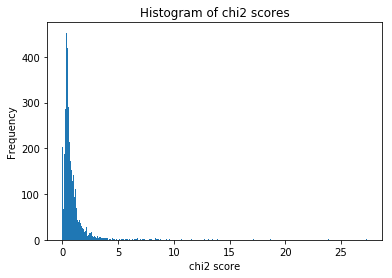

In [24]:
# see selectkbest(chi2) scores of different features. The higher the score, the more related the 
# feature is to the target, y, hence should be retained. 
plt.hist(skb_chi2.scores_, bins='auto',align='mid');
plt.title('Histogram of chi2 scores')
plt.xlabel('chi2 score');
plt.ylabel('Frequency');

Here we see that there are many words which have little relevance to the target.

In [25]:
# see no. of features, and no. of features having at least a certain chi2 score
print('No. of features: ',skb_chi2.scores_.shape[0])
print('No. of features having >3 chi2 score with y: ',(skb_chi2.scores_>3).sum())

No. of features:  3616
No. of features having >3 chi2 score with y:  136


We see that there are many features which are rather unrelated to y, and only 100+ have at least a chi2 score of 3 (arbitrarily chosen) relative to y. Lets just experiment with retaining 100 features first. We can do gridsearch later on.

In [26]:
# randomly try selectkbest's chi2's k_number = 100
X_train_tvec_chi2, skb_chi2, retained_categorical_features = chi2_feature_selection(X_train_tvec_df, y_train, k_number=100)
X_test_tvec_chi2 = X_test_tvec_df[retained_categorical_features]

Now, lets apply logreg onto our datasets, to learn to classify them.

In [27]:
# instantiate logreg, and see its train & test scores.
logreg = LogisticRegression()
logreg.fit(X_train_tvec_chi2, y_train)
predictions_logreg = logreg.predict(X_test_tvec_chi2)
print(logreg.score(X_train_tvec_chi2, y_train))
print(logreg.score(X_test_tvec_chi2, y_test))

0.8872745490981964
0.856


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now, lets also try applying Bayes Classifier to our datasets, to classify them. We will not try GaussianNB, as it is meant for continuous features (unlike the categorical word features we have here), and have a gaussian/normal distribution. 

In [28]:
# lets try using multinomial, and see its train & test scores.

# We choose multinomial, because... 
# "The multinomial Naive Bayes classifier is suitable for classification
# with discrete features (e.g., word counts for text classification)."

# Also, even though the coefficients are not integers...
# "however in practice, fractional counts such as tf-idf may also work", which was the same tfidf that we used.
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

mn = MultinomialNB()
mn.fit(X_train_tvec_chi2, y_train)
predictions_mn = mn.predict(X_test_tvec_chi2)
print(mn.score(X_train_tvec_chi2, y_train))
print(mn.score(X_test_tvec_chi2, y_test))

0.7650300601202404
0.774


In [29]:
# lets try using bernoulliNB too (as it suits categorical features too), and see its train & test scores.

bn = BernoulliNB()
bn.fit(X_train_tvec_chi2, y_train)
predictions_bn = bn.predict(X_test_tvec_chi2)
print(bn.score(X_train_tvec_chi2, y_train))
print(bn.score(X_test_tvec_chi2, y_test))

0.8942885771543087
0.87


BernoulliNB performs best, then logreg, then MultinomialNB, but all are certainly better than the baseline score of ~0.5. But let's not make a decision between any of these 3 models yet.

Lets try to put them all (tfidf, logreg/multinomial/bernoulli) through a pipeline then a gridsearchcv, to find the optimum hyperparameters of these models when used together. 

In [30]:
# instantiate a list to store tfidf and logreg/mn/bn models, and test scores
model_optimal,test_score = [],[]

In [31]:
# logreg
pipe = Pipeline(steps=[('tvec',TfidfVectorizer()),
                              ('logreg',LogisticRegression())])
pipe_params = {
    'tvec__max_features': [1000, 2000, 3000, None],  #include the default 'None'=max for comparison against earlier default model
    'tvec__min_df': [1, 25, 50],               #include the default '1' for comparison against earlier default model
    'tvec__max_df': [0.7, .9, 0.95]            #include 0.95, ~the default '1' for comparison against earlier default model
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5, n_jobs=-1)  #'n_jobs=-1' utilises ALL cores on computer. Faster
gs.fit(X_train, y_train)
model_optimal.append(gs.best_estimator_)
test_score.append(gs.score(X_test, y_test))
print('Train score:',gs.best_score_)
print('Best params:',gs.best_params_)
print('Test score :',gs.score(X_test, y_test))

Train score: 0.9253507014028056
Best params: {'tvec__max_df': 0.7, 'tvec__max_features': 3000, 'tvec__min_df': 1}
Test score : 0.926


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
# multinomialnb
pipe = Pipeline(steps=[('tvec',TfidfVectorizer()),
                              ('mn',MultinomialNB())])
pipe_params = {
    'tvec__max_features': [1000, 2000, 3000, None],  #include the default 'None'=max for comparison against earlier default model
    'tvec__min_df': [1, 25, 50],               #include the default '1' for comparison against earlier default model
    'tvec__max_df': [0.2, 0.7, .9]            #include 0.95, ~the default '1' for comparison against earlier default model
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5, n_jobs=-1)  #'n_jobs=-1' utilises ALL cores on computer. Faster
gs.fit(X_train, y_train)
model_optimal.append(gs.best_estimator_)
test_score.append(gs.score(X_test, y_test))
print('Train score:',gs.best_score_)
print('Best params:',gs.best_params_)
print('Test score :',gs.score(X_test, y_test))

Train score: 0.9208416833667334
Best params: {'tvec__max_df': 0.2, 'tvec__max_features': 3000, 'tvec__min_df': 1}
Test score : 0.94


In [33]:
# bernoullinb
pipe = Pipeline(steps=[('tvec',TfidfVectorizer()),
                              ('bn',BernoulliNB())])
pipe_params = {
    'tvec__max_features': [1000, 2000, 3000, None],  #include the default 'None'=max for comparison against earlier default model
    'tvec__min_df': [1, 25, 50],               #include the default '1' for comparison against earlier default model
    'tvec__max_df': [0.2,0.7, .9]            #include 0.95, ~the default '1' for comparison against earlier default model
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5, n_jobs=-1)  #'n_jobs=-1' utilises ALL cores on computer. Faster
gs.fit(X_train, y_train)
model_optimal.append(gs.best_estimator_)
test_score.append(gs.score(X_test, y_test))
print('Train score:',gs.best_score_)
print('Best params:',gs.best_params_)
print('Test score :',gs.score(X_test, y_test))

Train score: 0.9338677354709419
Best params: {'tvec__max_df': 0.2, 'tvec__max_features': 3000, 'tvec__min_df': 1}
Test score : 0.926


In [34]:
# store parameters of optimal tvec
index_optimal = np.argmax(test_score)   #store position of max test score, for use in next few lines
maxdf = model_optimal[index_optimal].steps[0][1].max_df
maxfeatures = model_optimal[index_optimal].steps[0][1].max_features
mindf = model_optimal[index_optimal].steps[0][1].min_df

We see that all 3 (logreg, multinomialNB, bernoulliNB) perform well too. But still let's not confirm yet, and let's try to insert SelectKBest(chi2) between these 2 steps (as before) to further remove  features that are less related to the target, to see if that improves the score.

(*Note: Alas selectKBest(chi2) could not be inserted between tvec and logreg/multinomialNB/bernoulliNB within a pipeline as it is not a 'Transformer' which is required in a pipeline*)

In [35]:
# using optimal tvec hyperparameters, vectorize both training and test data

# you can see here that tvec_optimal dynamically changes each time model is trained from the previous step
tvec_optimal = TfidfVectorizer(max_df=maxdf, max_features=maxfeatures, min_df=mindf)    
X_train_tvec = tvec_optimal.fit_transform(X_train).toarray()  #to convert from sparse matrix to an n-dimensional array
X_train_tvec_df = pd.DataFrame(X_train_tvec, columns=tvec_optimal.get_feature_names())
print(X_train_tvec_df.shape)

X_test_tvec = tvec_optimal.transform(X_test).toarray()  #only transform, NOT fit!
X_test_tvec_df = pd.DataFrame(X_test_tvec, columns=tvec_optimal.get_feature_names())
print(X_test_tvec_df.shape)

(1996, 3000)
(500, 3000)


In [36]:
# run chi2 function (find best k with my manual 'Gridsearch') to drop categorical features which aren't strongly related to the target variable.
# then use logreg, and see its train & test scores.

predictions_optimal,train_score,test_score,X_train_optimal,categories_optimal = [],[],[],[],[]
k_list = [1000,2000,2500,X_test_tvec_df.shape[1]]
for k in k_list:  #try out different k for selectkbest(chi2), capped at max features
    X_train_tvec_chi2, skb_chi2, retained_categorical_features = chi2_feature_selection(X_train_tvec_df, y_train, k)
    X_test_tvec_chi2 = X_test_tvec_df[retained_categorical_features]
    logreg.fit(X_train_tvec_chi2, y_train)
    X_train_optimal.append(X_train_tvec_chi2)
    categories_optimal.append(retained_categorical_features)
    predictions_optimal.append(logreg.predict(X_test_tvec_chi2))
    train_score.append(logreg.score(X_train_tvec_chi2, y_train))
    test_score.append(logreg.score(X_test_tvec_chi2, y_test))
    print('k =',k)
    print('Train scores:',logreg.score(X_train_tvec_chi2, y_train))
    print('Test scores :',logreg.score(X_test_tvec_chi2, y_test))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


k = 1000
Train scores: 0.9579158316633266
Test scores : 0.904
k = 2000
Train scores:

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 0.9714428857715431
Test scores : 0.918
k = 2500
Train scores: 0.9764529058116233
Test scores : 0.92
k = 3000
Train scores: 0.9829659318637275
Test scores : 0.926


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
# then use multinomialNB, and see its train & test scores.

for k in k_list:  #try out different k for selectkbest(chi2), capped at max features
    X_train_tvec_chi2, skb_chi2, retained_categorical_features = chi2_feature_selection(X_train_tvec_df, y_train, k)
    X_test_tvec_chi2 = X_test_tvec_df[retained_categorical_features]
    mn.fit(X_train_tvec_chi2, y_train)
    X_train_optimal.append(X_train_tvec_chi2)
    categories_optimal.append(retained_categorical_features)
    predictions_optimal.append(mn.predict(X_test_tvec_chi2))
    train_score.append(mn.score(X_train_tvec_chi2, y_train))
    test_score.append(mn.score(X_test_tvec_chi2, y_test))
    print('k =',k)
    print('Train scores:',mn.score(X_train_tvec_chi2, y_train))
    print('Test scores :',mn.score(X_test_tvec_chi2, y_test))

k = 1000
Train scores: 0.9504008016032064
Test scores : 0.92
k = 2000
Train scores: 0.9739478957915831
Test scores : 0.934
k = 2500
Train scores: 0.9784569138276553
Test scores : 0.934
k = 3000
Train scores: 0.9819639278557114
Test scores : 0.94


In [38]:
# repeat with bernoulliNB, and see its train & test scores.

for k in k_list:  #try out different k for selectkbest(chi2), capped at max features
    X_train_tvec_chi2, skb_chi2, retained_categorical_features = chi2_feature_selection(X_train_tvec_df, y_train, k)
    X_test_tvec_chi2 = X_test_tvec_df[retained_categorical_features]
    bn.fit(X_train_tvec_chi2, y_train)
    X_train_optimal.append(X_train_tvec_chi2)
    categories_optimal.append(retained_categorical_features)
    predictions_optimal.append(bn.predict(X_test_tvec_chi2))
    train_score.append(bn.score(X_train_tvec_chi2, y_train))
    test_score.append(bn.score(X_test_tvec_chi2, y_test))
    print('k =',k)
    print('Train scores:',bn.score(X_train_tvec_chi2, y_train))
    print('Test scores :',bn.score(X_test_tvec_chi2, y_test))

k = 1000
Train scores: 0.9744488977955912
Test scores : 0.932
k = 2000
Train scores: 0.9804609218436874
Test scores : 0.926
k = 2500
Train scores: 0.9779559118236473
Test scores : 0.924
k = 3000
Train scores: 0.9759519038076152
Test scores : 0.926


In [39]:
# print out the best result
index_optimal = np.argmax(test_score)   #store position of max test score, for later use
X_train_optimal = X_train_optimal[index_optimal]
predictions_optimal = predictions_optimal[index_optimal]
categories_optimal = categories_optimal[index_optimal]

# like tvec_optimal, you'll see here that model_optimal dynamically changes each time model is trained from the previous steps
if (index_optimal<4):
    model_optimal = logreg
    print('Best model is logreg, with optimal k:', k_list[(index_optimal)%3], 'highest test score:', max(test_score))
elif (index_optimal<8):
    model_optimal = mn
    print('Best model is mn, with optimal k:', k_list[(index_optimal)%3], 'highest test score:', max(test_score))
else:
    model_optimal = bn
    print('Best model is bn, with optimal k:', k_list[(index_optimal)%3], 'highest test score:', max(test_score))

Best model is mn, with optimal k: 2000 highest test score: 0.94


Best test accuracy score of ~90+% from the above-mentioned model, and optimal k value are as seen above, so lets stick with that, and the optimal k for SelectKBest(chi2).

Now lets see the confusion matrix, and the specificity and sensitivity.

In [40]:
pd.DataFrame(confusion_matrix(y_test, predictions_optimal),index=['ActualF','ActualT'], columns=['PredF','PredT'])

,PredF,PredT
ActualF,227,22
ActualT,8,243


In [41]:
tn,fp,fn,tp = confusion_matrix(y_test, predictions_optimal).ravel()  #unravel into a 1x4 list
print('specificity =',tn/(tn+fp))
print('sensitivity =',tp/(tp+fn))

specificity = 0.9116465863453815
sensitivity = 0.9681274900398407


Score (~90+% as seen just recently above), significantly higher than the baseline score of ~0.5 or 50%. Which is good. Specificity & sensitivity  are all high too. Which is good, as we actually want to have both a high sensitivity and a high sensitivity - we want to maximise sensitivity via minimizing the wrongful filtering of legitimate science posts (false negatives), AND also maximise specificity via minimizing the wrongful retention of actual troll/joke posts (false positives).

Let's look at the ROC curve.

In [42]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in model_optimal.predict_proba(X_test_tvec_chi2)]    #[0] contains 1-p, [1] contains p

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba},)
pred_df.tail()

,true_values,pred_probs
1725,2,0.746786
919,1,0.071645
1367,2,0.862653
413,1,0.200204
812,1,0.109530


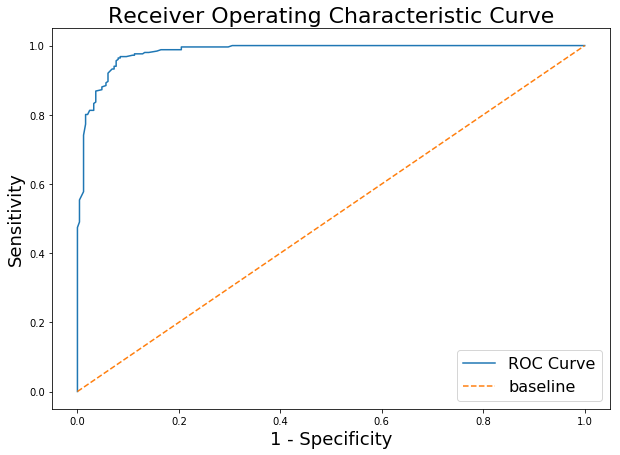

In [43]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 2) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 2) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 1) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 1) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

ROC curve looks good, as it leans towards the top left corner, covering a large area between it and the red baseline. Lets have a look at its ROC score.

In [44]:
roc_auc_score(y_test,predictions_optimal)

0.9398870381926111

Also very good (as seen from the good specificity and sensitivity scores earlier), 90+%. Let's have a look at the word clouds of titles belonging to each class.

In [45]:
# first create a dataframe for the train set and its target 
words_train = pd.DataFrame(X_train,columns=['titles_cleaned'])
words_train['class'] = y_train

# repeat for test set
words_test = pd.DataFrame(X_test,columns=['titles_cleaned'])
words_test['class'] = y_test
words_test.head()

,titles_cleaned,class
23,a guy sit home hear knock door he open door se...,1
1879,in way bring arm spin spin faster thing pull g...,2
1289,how uv index 0 light outsid are still suffer s...,2
2135,how space probe travel differ,2
945,two sperm meet,1


In [46]:
# join them all so that wordcloud can work
words_train_class1 = ' '.join(words_train[words_train['class']==1]['titles_cleaned'])
words_test_class1 = ' '.join(words_test[words_test['class']==1]['titles_cleaned'])

words_train_class2 = ' '.join(words_train[words_train['class']==2]['titles_cleaned'])
words_test_class2 = ' '.join(words_test[words_test['class']==2]['titles_cleaned'])

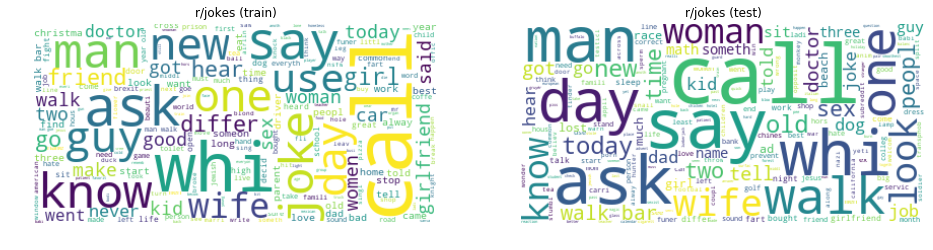

In [47]:
# compare word clouds between train vs test set, for the 1st subreddit
from wordcloud import WordCloud
wordcloud_train_class1 = WordCloud(max_font_size=80, max_words=200,
                       background_color="white",
                     contour_width=5, contour_color='firebrick').generate(words_train_class1)
wordcloud_test_class1 = WordCloud(max_font_size=80, max_words=200,
                       background_color="white",
                     contour_width=5, contour_color='firebrick').generate(words_test_class1)

fig, ax = plt.subplots(1,2,figsize=(16,10));
ax[0].imshow(wordcloud_train_class1, interpolation="bilinear");
ax[0].set_title('r/jokes (train)');
ax[0].axis("off");
ax[1].imshow(wordcloud_test_class1, interpolation="bilinear");
ax[1].set_title('r/jokes (test)');
ax[1].axis("off");

Most common words for r/jokes would be 'call', 'whi(ch)', 'man', 'ask', 'say' etc.

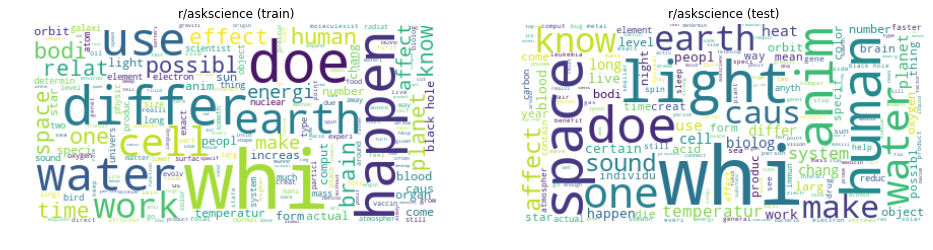

In [48]:
# compare word clouds between train vs test set, for the 2nd subreddit
wordcloud_train_class2 = WordCloud(max_font_size=80, max_words=200,
                       background_color="white",
                     contour_width=5, contour_color='firebrick').generate(words_train_class2)
wordcloud_test_class2 = WordCloud(max_font_size=80, max_words=200,
                       background_color="white",
                     contour_width=5, contour_color='firebrick').generate(words_test_class2)

fig, ax = plt.subplots(1,2,figsize=(16,10));
ax[0].imshow(wordcloud_train_class2, interpolation="bilinear");
ax[0].set_title('r/askscience (train)');
ax[0].axis("off");
ax[1].imshow(wordcloud_test_class2, interpolation="bilinear");
ax[1].set_title('r/askscience (test)');
ax[1].axis("off");

Most common words for r/askscience would be 'whi(ch)', 'happen', 'doe(s)', 'differ(ent)', 'earth' etc.

What if we try to classify 2 strings from different subreddits/classes but have similar words?

In [49]:
# first lets create the function to run the optimal parameters and models and process the new strings

def classify(string1,string2,tvec_optimal,X_train,X_train_optimal,y_train,categories_optimal,model_optimal):
    string1 = [clean_words(string1)]  #run function on it, and put in a list so that tvec can act on it
    string2 = [clean_words(string2)]

    # fit transform with optimal tvec hyperparameters, then use the reduced categories filtered out by skb_chi2_optimal
    tvec_optimal.fit_transform(X_train).toarray()
    string1_tvec = tvec_optimal.transform(string1).toarray()
    string2_tvec = tvec_optimal.transform(string2).toarray()
    string1_tvec_df = pd.DataFrame(string1_tvec, columns=tvec_optimal.get_feature_names())   #put in df, so that we can filter out feature columns right below
    string2_tvec_df = pd.DataFrame(string2_tvec, columns=tvec_optimal.get_feature_names())
    string1_tvec_chi2 = string1_tvec_df[categories_optimal]  #filter out feature columns as per those selected by the optimal skb_chi2
    string2_tvec_chi2 = string2_tvec_df[categories_optimal]
    model_optimal.fit(X_train_optimal, y_train)  #finally, fit using the best from amongst logreg/multinomialNB/bernoulliNB

    # predict for both strings
    print('Class:',model_optimal.predict(string1_tvec_chi2))
    print('Class:',model_optimal.predict(string2_tvec_chi2))

In [50]:
# try on normal strings 
string1 = 'Ever have amnesia and deja vu at the same time?'                       #from r/jokes, class1
string2 = '''Does a person suffering from amnesia retain the personality traits   
formed from/during the experiences they can no longer remember?'''                #from r/askscience, class2
classify(string1,string2,tvec_optimal,X_train,X_train_optimal,y_train,categories_optimal,model_optimal)

Class: [1]
Class: [2]


Works well!

But what if puns/hidden meanings are present? eg. 'Uranus' intended to be 'ur anus'

In [52]:
# try on tricky strings
string1 = 'NASA sent a probe to all of the planets in our solar system, but quit after Uranus' #from r/jokes, class1
string2 = 'Why are the rings of Uranus turned sideways?'                                  #from r/askscience, class2
classify(string1,string2,tvec_optimal,X_train,X_train_optimal,y_train,categories_optimal,model_optimal)

Class: [2]
Class: [2]


Misclassification occurred here, eg. string1 from r/jokes was misclassified as belonging to the r/askscience subreddit. Clearly our classifier has room for improvement, when puns are present.

## Conclusion

Our model (tvec with gridsearch >> selectkbest(chi2) >> best of logreg/multinomialNB/bernoulliNB), on the whole, works well in classifying posts (using their titles) according to whether it belongs to the r/askscience or the r/jokes subreddit. The accuracy is high (90+%), and the specificity (90+%) and sensitivity (90+%) are both high as well. The r/askscience moderators would be pleased, since this would provide a good first cut filter, to remove troll posts that masquerade as science-related posts.

Additionally, given that our 'positive' class is class2 (=r/askscience), we actually want to have both a high sensitivity and a high sensitivity (achieved as shown above) - we want to maximise sensitivity via minimizing the wrongful filtering of legitimate science posts (false negatives), AND also maximise specificity via minimizing the wrongful retention of actual troll/joke posts (false positives).

Also, each time this series of models is re-trained (which is likely necessary, periodically, so as to keep up with changing trends in trendy words) with refreshed training data, it dynamically updates itself with the best tvec parameters (see tvec_optimal above), and the best from amongst logreg/multinomialNB/bernoulliNB (see model_optimal above). This makes it a **current & dynamic** solution for the moderators, because sometimes a different tvec's max_df may work better, or perhaps logreg may work better (vs multinomialNB/bernoulliNB), whenever the training data changes (which happens frequently enough).

But limitations exist...

## Limitations & Future work

We saw here that puns are not well classified. We would expect more misclassifications when there are double-entendres, sarcasm etc. Additionally, as mentioned earlier, since topics in trend change with time (Higgs Boson was popular earlier, but in future maybe new Tesla car models would be more in-trend), these models would need to be trained often enough, to "keep up with the trends", for accurate classification.